# Project 2 - Football Analysis
##### Author: Louis Bademosi

##### Note to self:
- Start with the plan
- Remember to use auto pep8 for clean idiomatic code
- Build at least 2 classes to help do get each portion of the project done. Cleaning, EDA, Extracting the data etc.
- Some of the language is german so I may need to translate the columns eg. kader means squad
---

 ### Questions to Answer 
 ##### What the the MongoDB instance has to contain: 
 
* The name of the team
* The total number of goals scored by the team during the 2011 season
* The total number of wins the team earned during the 2011 season
* A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly by assigning it to a variable)
* The team's win percentage on days where it was raining during games in the 2011 season. 

# Project Plan
- query the 2011 data only
- inner join other tables to 2011 data tables  
- very quick search for any cleaning required isnull() etc.
- create 1 datafame containing [Team| Goals Scored| Games Won| Games Lost]
- create a histogram plot for each teams wins/loses

#### The last question is the real work:
- gain access to the weather in berlin for the dates of the matches
- create a datafame containing [Match id| Date| Weather| Home Team| Away Team]
- Find out for each team their win/loss outcome on the day it rained

---

# Load data and light inspection

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import sqlite3
import warnings
warnings.filterwarnings("ignore")

In [66]:
conn = sqlite3.connect("database.sqlite")
cur = conn.cursor()

In [77]:
"""Filtering for just the 2011 games, then relabelling the last 3 columns from the abreviations to clear names. 
Also changing H, A, and D values in the results table to explicitly say home, away, or draw"""


cur.execute("""SELECT *
               FROM Matches
               WHERE season = '2011' 
               ;""")

matches_df = pd.DataFrame(cur.fetchall())
matches_df.columns = [x[0] for x in cur.description]
matches_df

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D
5,1097,D1,2011,2012-01-20,M'gladbach,Bayern Munich,3,1,H
6,1098,D1,2011,2012-02-04,Hamburg,Bayern Munich,1,1,D
7,1099,D1,2011,2012-04-21,Werder Bremen,Bayern Munich,1,2,A
8,1100,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,A
9,1101,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,H


In [13]:
cur.execute("""SELECT *
               FROM Teams
               WHERE season = '2011'
               """)

teams_df = pd.DataFrame(cur.fetchall())
teams_df.columns = [x[0] for x in cur.description]
teams_df

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2011,Bayern Munich,24,25,11,335600000,13980000,75000
1,2011,Dortmund,28,24,12,158200000,5650000,81359
2,2011,Leverkusen,29,23,9,151100000,5210000,30210
3,2011,Schalke 04,37,24,20,136730000,3700000,62271
4,2011,Werder Bremen,38,23,17,125350000,3300000,42100
5,2011,Wolfsburg,44,25,28,122000000,2770000,30000
6,2011,Hamburg,36,23,23,103200000,2870000,57376
7,2011,Stuttgart,32,24,18,101880000,3180000,60449
8,2011,Hoffenheim,34,23,20,93600000,2750000,30164
9,2011,FC Koln,31,24,17,69290000,2240000,49968


In [14]:
cur.execute("""SELECT *
               FROM Teams_in_Matches""")

match_team_df = pd.DataFrame(cur.fetchall())
match_team_df.columns = [x[0] for x in cur.description]
match_team_df

,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26
5,3,44
6,4,29
7,4,44
8,5,29
9,5,49


In [15]:
cur.execute("""SELECT *
               FROM Unique_Teams""")

unique_teams_df = pd.DataFrame(cur.fetchall())
unique_teams_df.columns = [x[0] for x in cur.description]
unique_teams_df

,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5
5,M'gladbach,6
6,Wolfsburg,7
7,FC Koln,8
8,Hoffenheim,9
9,Hertha,10


# Data cleaning (haven't seen anything that needs cleaning in the data)

# Filtering data and joining the tables I need

## First creating the total number of goals scored column

In [158]:
"""Selecting the home teams and the goals they scored"""

cur.execute("""SELECT HomeTeam AS TeamName, SUM(FTHG) AS HomeGoals
               FROM Matches
               WHERE season = '2011' 
               AND NOT Div = 'E0'
               GROUP BY HomeTeam
               ;""")



home_goals_df = pd.DataFrame(cur.fetchall())
home_goals_df.columns = [x[0] for x in cur.description]
home_goals_df

,TeamName,HomeGoals
0,Aachen,15
1,Augsburg,20
2,Bayern Munich,49
3,Bochum,23
4,Braunschweig,21
5,Cottbus,18
6,Dortmund,44
7,Dresden,30
8,Duisburg,23
9,Ein Frankfurt,38


In [71]:
"""Selecting the away teams and the goals they scored"""

cur.execute("""SELECT AwayTeam AS TeamName, SUM(FTAG) AS AwayGoals
               FROM Matches
               WHERE season = '2011' 
               AND NOT Div = 'E0'
               GROUP BY AwayTeam
               ;""")



away_goals_df = pd.DataFrame(cur.fetchall())
away_goals_df.columns = [x[0] for x in cur.description]
away_goals_df

,TeamName,AwayGoals
0,Aachen,15
1,Augsburg,16
2,Bayern Munich,28
3,Bochum,18
4,Braunschweig,16
5,Cottbus,12
6,Dortmund,36
7,Dresden,20
8,Duisburg,19
9,Ein Frankfurt,38


In [72]:
"""joining the two tables for away and home goals and creating a column for total goals"""

total_goals_df = home_goals_df.merge(away_goals_df, how="inner", on="TeamName")
total_goals_df['TotalGoals'] = total_goals_df['HomeGoals'] + total_goals_df['AwayGoals']
total_goals_df

,TeamName,HomeGoals,AwayGoals,TotalGoals
0,Aachen,15,15,30
1,Augsburg,20,16,36
2,Bayern Munich,49,28,77
3,Bochum,23,18,41
4,Braunschweig,21,16,37
5,Cottbus,18,12,30
6,Dortmund,44,36,80
7,Dresden,30,20,50
8,Duisburg,23,19,42
9,Ein Frankfurt,38,38,76


## Now I want to add 2 columns: total number of games won per team and the toal number of games lost

In [95]:
# first select the home teams and their total wins at home

cur.execute("""SELECT HomeTeam AS TeamName, COUNT(FTR) AS HomeWins
               FROM Matches
               WHERE season = '2011' 
               AND FTR = 'H'
               AND NOT Div = 'E0'
               GROUP BY HomeTeam
               ;""")


home_wins_df = pd.DataFrame(cur.fetchall())
home_wins_df.columns = [x[0] for x in cur.description]
home_wins_df

,TeamName,HomeWins
0,Aachen,4
1,Augsburg,6
2,Bayern Munich,14
3,Bochum,7
4,Braunschweig,6
5,Cottbus,4
6,Dortmund,14
7,Dresden,8
8,Duisburg,8
9,Ein Frankfurt,11


In [96]:
# then select the away teams and their total wins away

cur.execute("""SELECT AwayTeam AS TeamName, COUNT(FTR) AS AwayWins
               FROM Matches
               WHERE season = '2011' 
               AND FTR = 'A'
               AND NOT Div = 'E0'
               GROUP BY AwayTeam
               ;""")


away_wins_df = pd.DataFrame(cur.fetchall())
away_wins_df.columns = [x[0] for x in cur.description]
away_wins_df

,TeamName,AwayWins
0,Aachen,2
1,Augsburg,2
2,Bayern Munich,9
3,Bochum,3
4,Braunschweig,4
5,Cottbus,4
6,Dortmund,11
7,Dresden,4
8,Duisburg,2
9,Ein Frankfurt,9


In [97]:
# join home wins with away wins

total_wins_df = home_wins_df.merge(away_wins_df, how="inner", on="TeamName")
total_wins_df['TotalWins'] = total_wins_df['HomeWins'] + total_wins_df['AwayWins']
total_wins_df

,TeamName,HomeWins,AwayWins,TotalWins
0,Aachen,4,2,6
1,Augsburg,6,2,8
2,Bayern Munich,14,9,23
3,Bochum,7,3,10
4,Braunschweig,6,4,10
5,Cottbus,4,4,8
6,Dortmund,14,11,25
7,Dresden,8,4,12
8,Duisburg,8,2,10
9,Ein Frankfurt,11,9,20


In [144]:
# select the home teams and their total loses 
"""Hannover doesn't have any home loses so it has given me NaN values for Hannover after merging and adding the home 
loses and away loses tables. I will manually add Hannova and a '0 int' for their home loses to circumvent this"""

cur.execute("""SELECT HomeTeam AS TeamName, COUNT(FTR) AS HomeLoses
               FROM Matches
               WHERE season = '2011' 
               AND FTR = 'A'
               AND NOT Div = 'E0'
               GROUP BY HomeTeam
               ;""")


home_loses_df = pd.DataFrame(cur.fetchall())
home_loses_df.columns = [x[0] for x in cur.description]




new_row = [{"TeamName": "Hannover", "HomeLoses": 0}]
home_loses_df = home_loses_df.append(new_row, ignore_index=True, sort=False)

home_loses_df

,TeamName,HomeLoses
0,Aachen,7
1,Augsburg,4
2,Bayern Munich,2
3,Bochum,7
4,Braunschweig,3
5,Cottbus,5
6,Dortmund,1
7,Dresden,4
8,Duisburg,7
9,Ein Frankfurt,1


In [145]:
# select the away teams and their total loses 

cur.execute("""SELECT AwayTeam AS TeamName, COUNT(FTR) AS AwayLoses
               FROM Matches
               WHERE season = '2011' 
               AND FTR = 'H'
               AND NOT Div = 'E0'
               GROUP BY AwayTeam
               ;""")


away_loses_df = pd.DataFrame(cur.fetchall())
away_loses_df.columns = [x[0] for x in cur.description]
away_loses_df

,TeamName,AwayLoses
0,Aachen,8
1,Augsburg,8
2,Bayern Munich,5
3,Bochum,10
4,Braunschweig,6
5,Cottbus,10
6,Dortmund,2
7,Dresden,9
8,Duisburg,8
9,Ein Frankfurt,5


In [148]:
# join the home loses with the away loses, to create a column with total loses

total_loses_df = home_loses_df.merge(away_loses_df, how="inner", on="TeamName")
total_loses_df['TotalLoses'] = total_loses_df['HomeLoses'] + total_loses_df['AwayLoses']
total_loses_df

,TeamName,HomeLoses,AwayLoses,TotalLoses
0,Aachen,7,8,15
1,Augsburg,4,8,12
2,Bayern Munich,2,5,7
3,Bochum,7,10,17
4,Braunschweig,3,6,9
5,Cottbus,5,10,15
6,Dortmund,1,2,3
7,Dresden,4,9,13
8,Duisburg,7,8,15
9,Ein Frankfurt,1,5,6


In [152]:
# join the total wins with the total loses
all_winsLoses_df = total_wins_df.merge(total_loses_df, how="inner", on="TeamName")
all_winsLoses_df

,TeamName,HomeWins,AwayWins,TotalWins,HomeLoses,AwayLoses,TotalLoses
0,Aachen,4,2,6,7,8,15
1,Augsburg,6,2,8,4,8,12
2,Bayern Munich,14,9,23,2,5,7
3,Bochum,7,3,10,7,10,17
4,Braunschweig,6,4,10,3,6,9
5,Cottbus,4,4,8,5,10,15
6,Dortmund,14,11,25,1,2,3
7,Dresden,8,4,12,4,9,13
8,Duisburg,8,2,10,7,8,15
9,Ein Frankfurt,11,9,20,1,5,6


In [180]:
# Join the TotalWins and TotalLoses columns to the total_goals_df 
# Drop the columns that aren't required to answer the questions

whole_team_df = total_goals_df.merge(all_winsLoses_df, how="inner", on="TeamName")

drop_cols = ['HomeGoals', 'AwayGoals', 'HomeWins', 'AwayWins', 'HomeLoses', 'AwayLoses']
final_team_df = whole_team_df.drop(labels=drop_cols, axis=1)
final_team_df['TotalGames'] = final_team_df['TotalWins'] + final_team_df['TotalLoses']
final_team_df

,TeamName,TotalGoals,TotalWins,TotalLoses,TotalGames
0,Aachen,30,6,15,21
1,Augsburg,36,8,12,20
2,Bayern Munich,77,23,7,30
3,Bochum,41,10,17,27
4,Braunschweig,37,10,9,19
5,Cottbus,30,8,15,23
6,Dortmund,80,25,3,28
7,Dresden,50,12,13,25
8,Duisburg,42,10,15,25
9,Ein Frankfurt,76,20,6,26


# Visualisations for each teams wins and loses

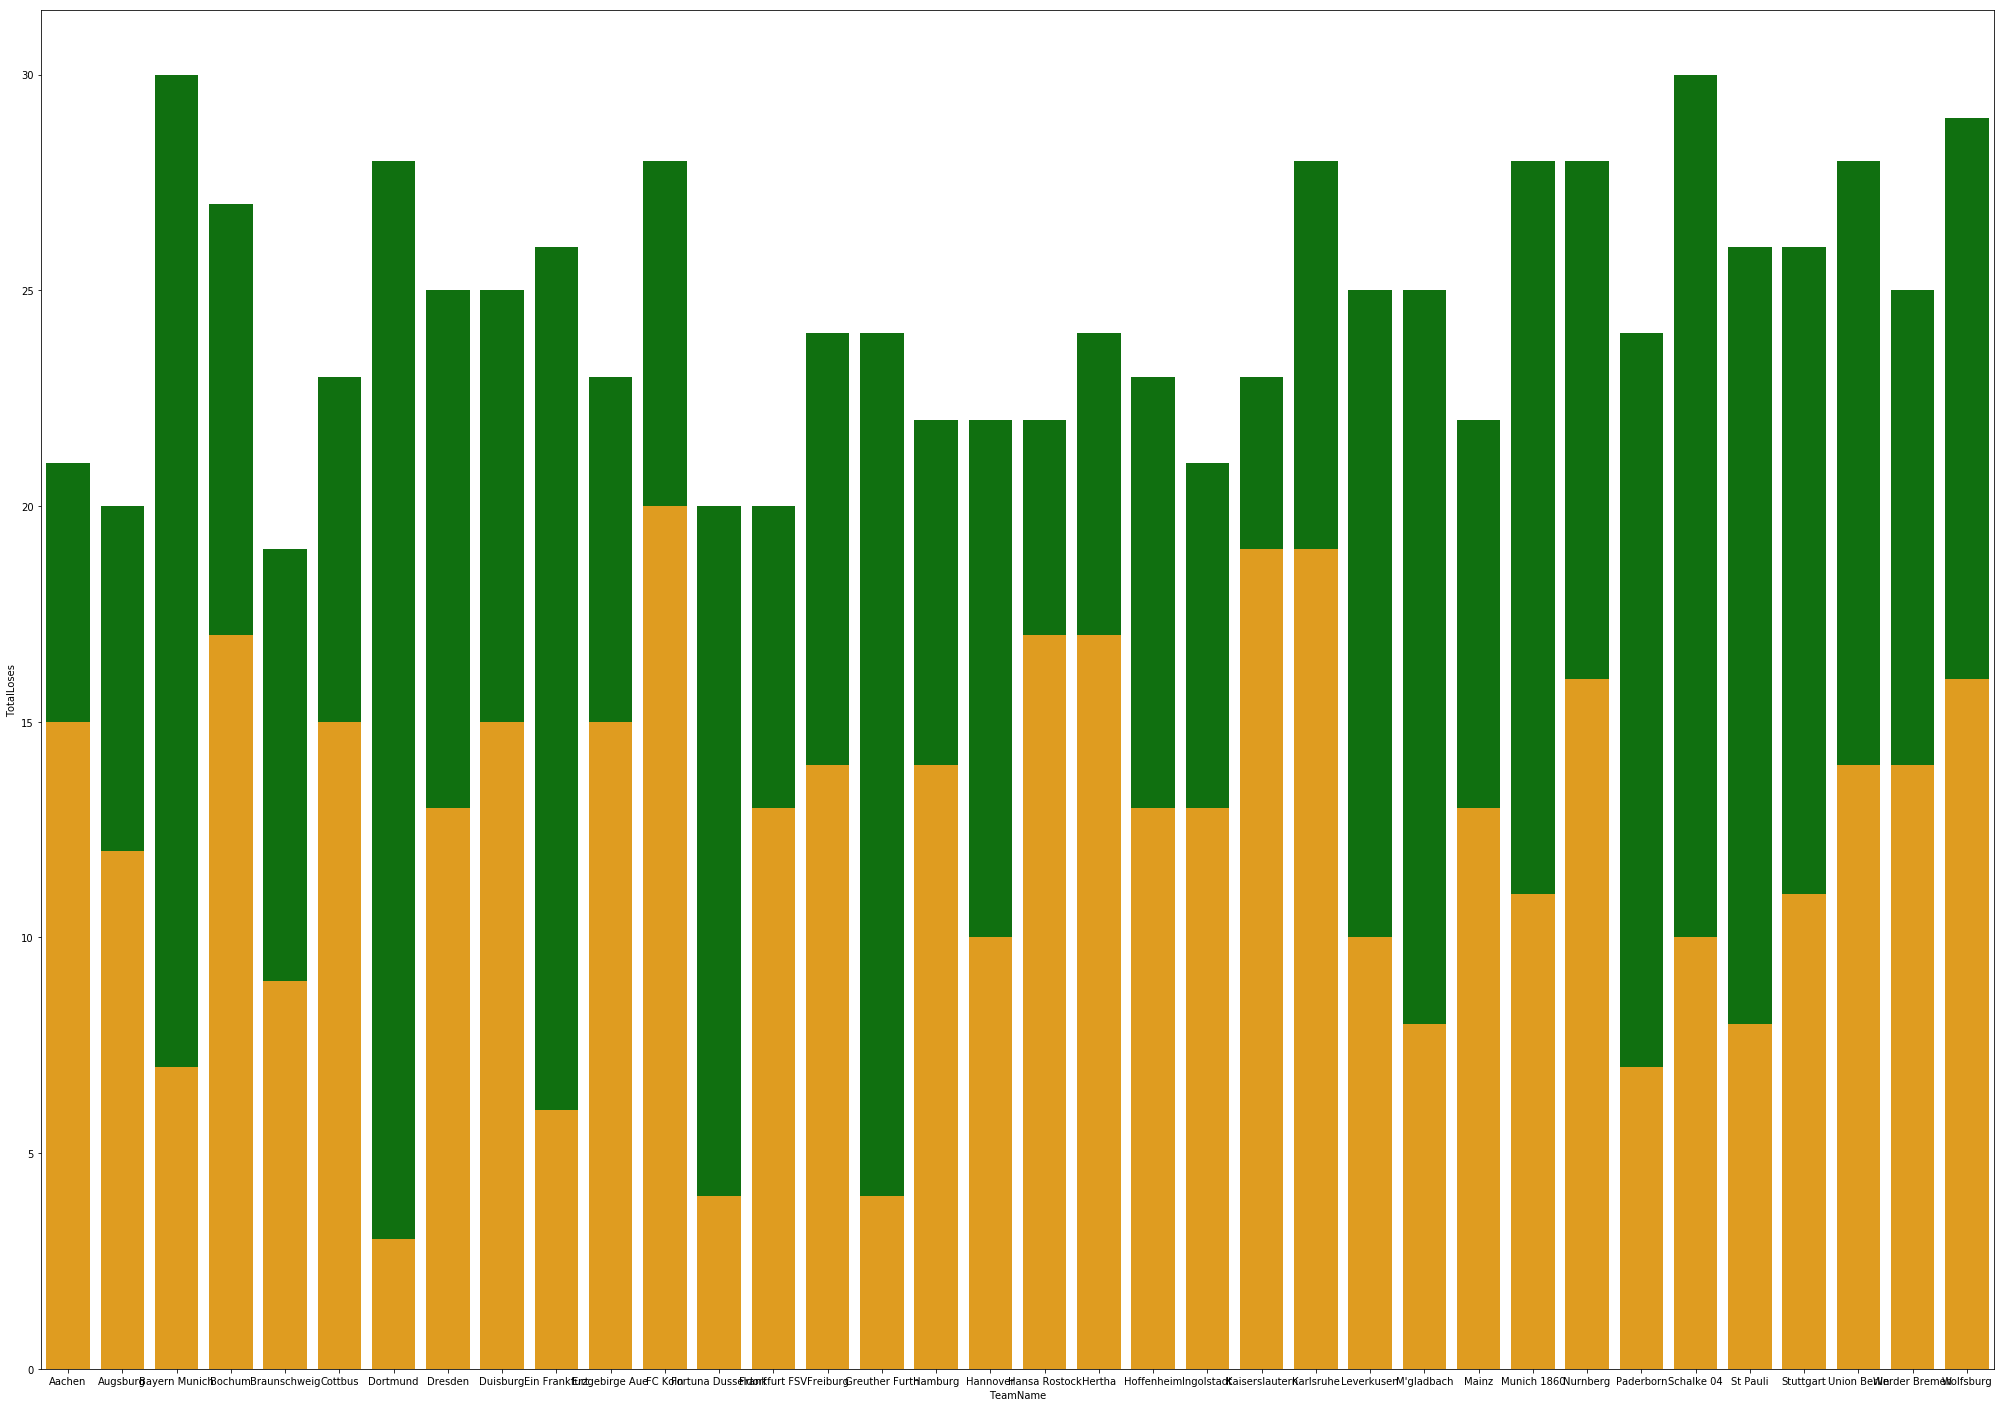

In [199]:
fig, ax = plt.subplots(figsize=(35, 25))

sns.barplot(data=final_team_df, x="TeamName", y="TotalGames", color="Green")
sns.barplot(data=final_team_df, x="TeamName", y="TotalLoses", color="Orange")
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(35, 25))

sns.barplot(data=final_team_df, x="TeamName", y="TotalGames", color="Green")
sns.barplot(data=final_team_df, x="TeamName", y="TotalLoses", color="Orange")
plt.show();

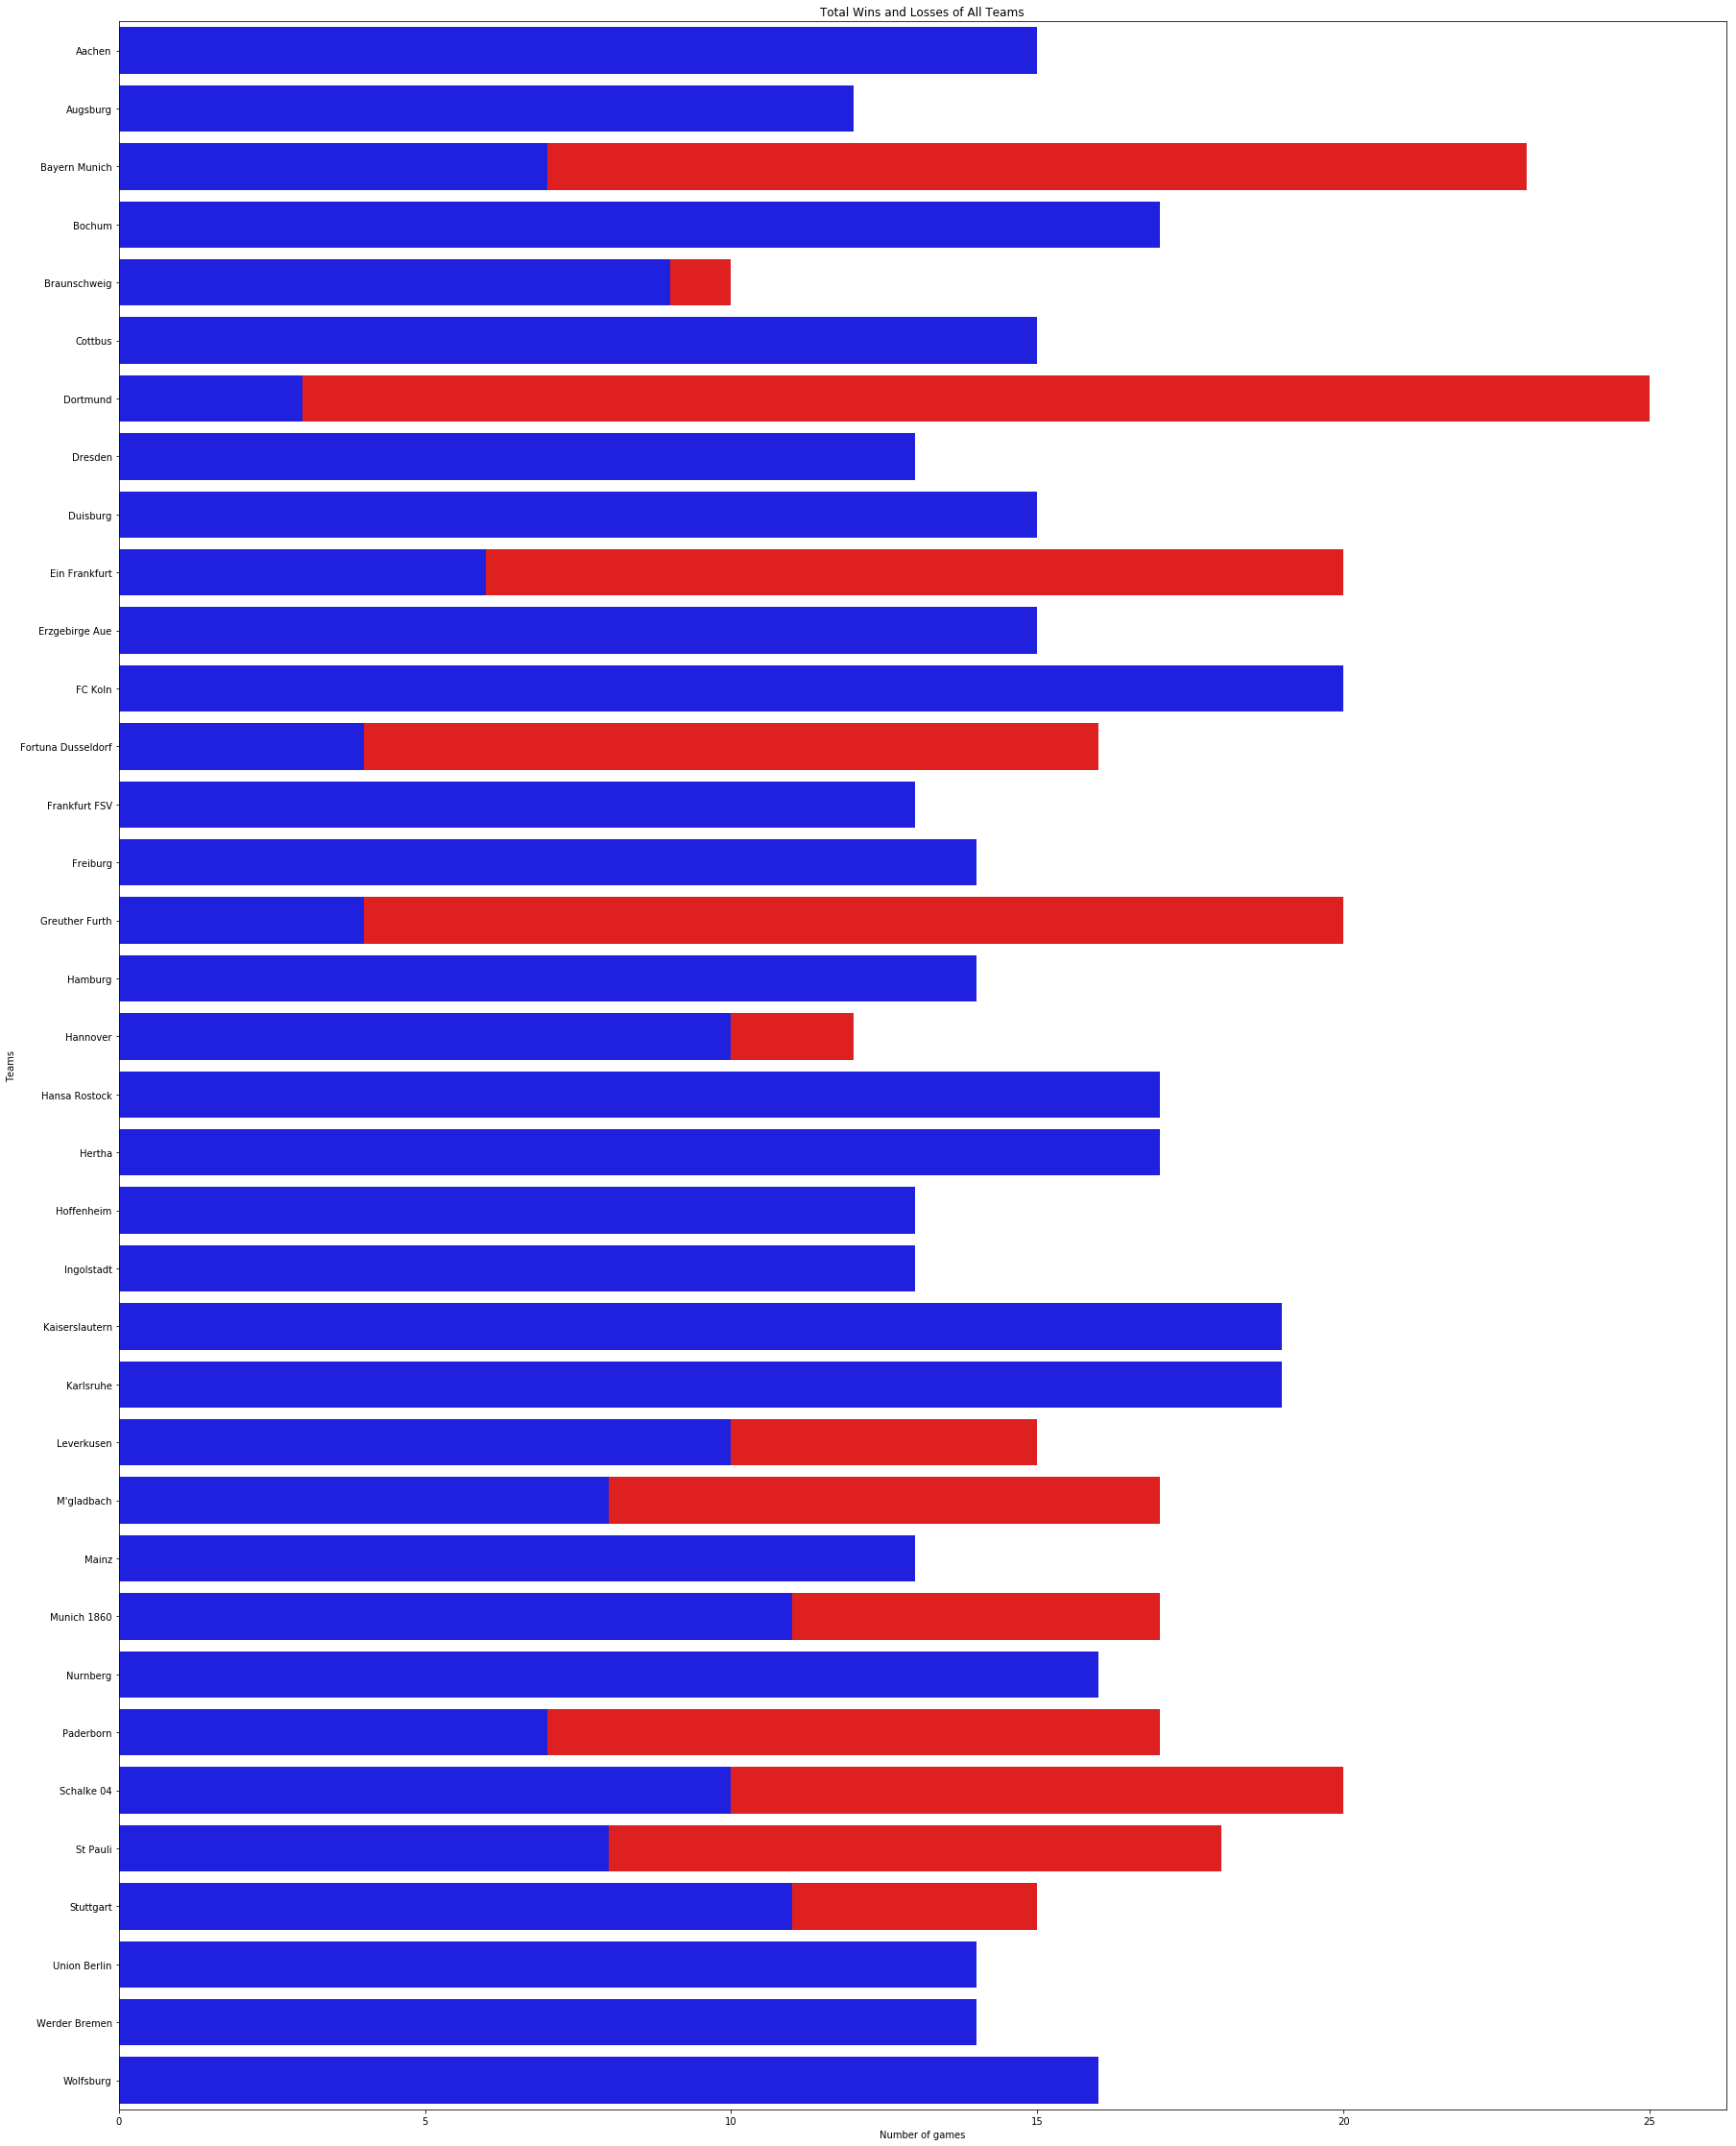

In [200]:
plt.figure(figsize=(30,40))
ax1 = sns.barplot(x="TotalWins" , y = "TeamName", data=final_team_df , color='red')
ax2 = sns.barplot(x='TotalLoses', y="TeamName", data=final_team_df, color ='blue')
plt.xlabel("Number of games")
plt.ylabel("Teams")
plt.title('Total Wins and Losses of All Teams' , fontsize = 12)
plt.show()